In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from matplotlib import patches

In [3]:
'''
Get the number of words spoken in an interview
'''
def get_word_count(filename):
    with open(filename, 'r') as file:
            count =0
            for line in file:
                words = line.split(":", 1)[1].strip()
                count += len(words.split())
    return count

In [4]:
'''
Get the initials of each speaker in a given interview
'''
def find_speakers(filename):
    speakers = []
    with open(filename, 'r') as file:
        for line in file: 
            initials = line[:6].split(": ")[0]
            if not initials:
                print("No initials found in a line of ", filename)
            elif initials not in speakers:
                speakers.append(initials)
        
    return speakers
        

In [5]:
'''
Get the number of words spoken by each person in an interview
'''
def get_speaker_counts(filename):
    with open(filename, 'r') as file:
        speakers = {}
        for line in file:
            initials = line[:6].split(": ")[0]
            if not initials:
                print("No initials found in a line of ", filename)
            elif initials in speakers.keys():
                speakers[initials] += len(line.split()) -1
            else:
                speakers[initials] = len(line.split()) -1
    return speakers

# print(get_speaker_counts("./transcripts_notes_removed/ddr-ajah-1-5-transcript.txt"))


In [ ]:
# """
# Given an oral history file, return a dictionary with keys
# speaker initials and values [number of times spoken, words spoken]
# """
# def find_speaker(filename):
#     file = open(filename, "r")
#     speakers = {}
#     for line in file:
#         # Check if a speaker is identified at the beginning of a line
#         index_speaker = line[0:4].find(':')
#         if index_speaker != -1:
#             speaker = line[0:index_speaker]
#             start = line.index(":") + 2
#             words = line[start:].split()
#             if speaker not in speakers:
#                 speakers[speaker] = [1, len(words)]
#             else:
#                 speakers[speaker][0] = speakers[speaker][0]+1
#                 speakers[speaker][1] = speakers[speaker][1]+len(words)
# 
#     #print(filename)
#     for key in speakers.keys():
#         print(key)
#     file.close()
#     return speakers

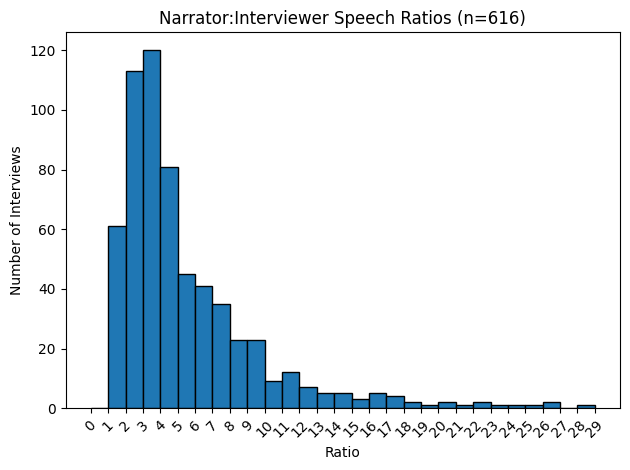

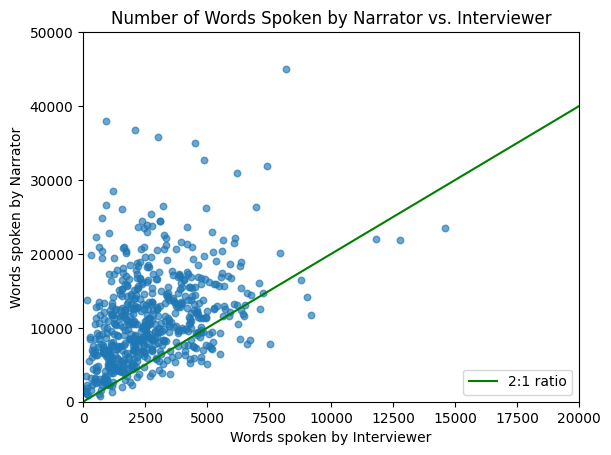

In [10]:
'''
Plot speaker ratio of narrator: interview 
'''

with open('./metadata/interview_metadata.csv', 'r') as file:
    csv_reader = csv.DictReader(file)
    
    ratios, narr_cts, int_cts, =[], [], []
    for row in csv_reader:
        # Only look at interviews with one narrator and one interviewer
        if len(row["Narrator"].split(","))==1 and len(row["Interviewer"].split(","))==1:
            transcript = "./transcripts_notes_removed/" + row["filename"]
            speaker_cts = list(get_speaker_counts(transcript).values())
            ratio = round(max(speaker_cts)/min(speaker_cts),1)
            
            if len(speaker_cts) == 2:
                ratios.append(ratio)
                narr_cts.append(max(speaker_cts))
                int_cts.append(min(speaker_cts))
            
            # if max(speaker_cts) < 5000:
            #     print(max(speaker_cts), row["filename"])

# Plot the histogram
plt.hist(ratios, bins=np.arange(0, 30, 1), edgecolor='black')

# Set x-ticks for the decades (e.g., 1930, 1940, etc.)
bins = np.arange(0, 30, 1)
plt.xticks(bins)
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Ratio')
plt.ylabel('Number of Interviews')
plt.title(f"Narrator:Interviewer Speech Ratios (n={len(ratios)})")

# Adjust the layout so everything fits
plt.tight_layout()
plt.show()

# Create the scatter plot
plt.scatter(int_cts, narr_cts, alpha=0.65, s=22)

# Set axis limits
plt.xlim(0, 20000)  # Set x-axis to go up to 20,000
plt.ylim(0, 50000)  # Set y-axis to go up to 50,000

# Add labels and title
plt.xlabel('Words spoken by Interviewer')
plt.ylabel('Words spoken by Narrator')
plt.title('Number of Words Spoken by Narrator vs. Interviewer')

# Generate x values
x = np.linspace(0, 50000, 50000)  # From -10 to 10 with 100 points

# Calculate y values
plt.plot(x, 2 * x , color='green', label="2:1 ratio")

# Show the plot
plt.legend(loc='lower right')
plt.show()

In [8]:
'''

'''
def get_speaker_turns(filename):
    speakers = find_speakers(filename)
    #turns = {speaker: [] for speaker in speakers}
    turns = []
    order = []
    with open(filename, 'r') as file:
        word = 0
        for line in file:
            speaker, line = line.split(":")[0], line.split(":")[1]
            turns.append(word)
            order.append(speaker)
            word += len(line.split())
    
    return turns, order
turns = get_speaker_turns("./transcripts_notes_removed/ddr-ajah-1-5-transcript.txt")
print(turns)

([0, 83, 99, 107, 458, 467, 1015, 1032, 1068, 1074, 1079, 1094, 1097, 1102, 1148, 1159, 1237, 1245, 1280, 1293, 1507, 1526, 1529, 1541, 1584, 1585, 1695, 1699, 1715, 1749, 1754, 1784, 1800, 1812, 1815, 1816, 1819, 1827, 1834, 1848, 1935, 1944, 1960, 1964, 2028, 2033, 2523, 2532, 2746, 2766, 2778, 2780, 2788, 2807, 2902, 2926, 2927, 2951, 3177, 3183, 3208, 3218, 3225, 3231, 3237, 3243, 3250, 3259, 3339, 3351, 3976, 3985, 4029, 4059, 4065, 4077, 4112, 4118, 4131, 4136, 4137, 4139, 4142, 4145, 4174, 4185, 4190, 4198, 4241, 4249, 4251, 4253, 4355, 4366, 4533, 4547, 4549, 4552, 4560, 4571, 4638, 4645, 4651, 4660, 4667, 4668, 4674, 4679, 4682, 4688, 4689, 4698, 4727, 4729, 4796, 4805, 5153, 5156, 5171, 5172, 5182, 5279, 5291, 5438, 5458, 5568, 5584, 5758, 5763, 5769, 5780, 5963, 5972, 6310, 6334, 6339, 6348, 6373, 6387, 6391, 6395, 6400, 6406, 6407, 6413, 6425, 6428, 6437, 6438, 6503, 6507, 6575, 6582, 6589, 6604, 6607, 6613, 6620, 6645, 6651, 6657, 6891, 6896, 6903, 6908, 6915, 6936, 7237, 

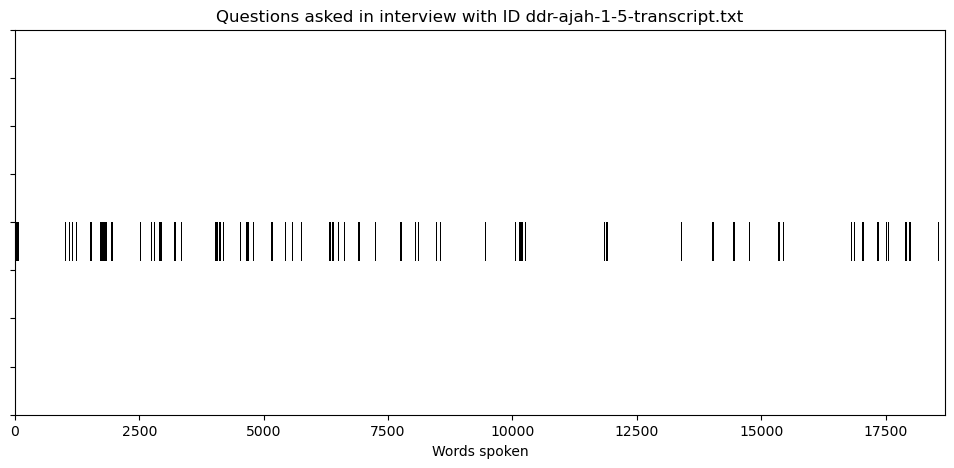

In [16]:
'''
Plot questions
'''

def plot_speaker_switches(filename):
    ct = get_word_count(filename)
    turn, order = get_speaker_turns(filename)
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 5))
    
    # Assign a unique color to each speaker
    speakers = find_speakers(filename)
    colors = ['black', 'white', 'yellow', 'purple', 'orange']
    speaker_color_map = {speaker: colors[i % len(colors)] for i, speaker in enumerate(speakers)}
    
    for i in range(len(order[:-1])):
        # Add a rectangle (box) at position (x=3, y=4.8) with width=1 and height=0.4
        box = patches.Rectangle((turn[i], 4.8), turn[i+1]-turn[i], 0.2, facecolor=speaker_color_map[order[i]], linewidth=6)
    
        # Add the box to the plot
        ax.add_patch(box)
    
    # Adjust plot limits
    ax.set_xlim(0, ct)
    ax.set_ylim(4, 6)
    
    ax.set_yticklabels([])
    plt.title(f'Questions asked in interview with ID {filename.split("/")[-1]}')
    ax.set_xlabel("Words spoken")

    
    plt.show()

#turns = get_speaker_turns("./transcripts_notes_removed/ddr-ajah-1-5-transcript.txt")
plot_speaker_switches("./transcripts_notes_removed/ddr-ajah-1-5-transcript.txt")


In [ ]:
'''
Given an oral history file and an array of speaker identifiers,
Return the question and longest answer
'''
def longest_qa_pair(file, speakers):
    longest_line = ""
    question = ""
    prev = ""
    file.seek(0)  # Reset the file pointer to the beginning
    for line in file:
        for speaker in speakers:
            if speaker in line[0:4]:
                if len(line) > len(longest_line):
                    longest_line = line
                    question = prev
                prev = line
    file.close()
    return question, longest_line